In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import imutils
import os

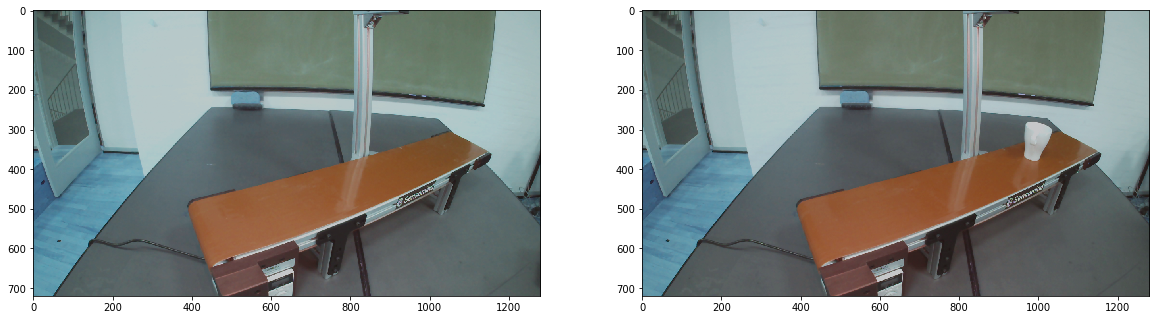

In [32]:
#images = glob.glob('imgs/*.png')
images1 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434279_805531979_Left.png')
images2 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434279_838711977_Left.png')
images3 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434279_871912003_Left.png')
images4 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434279_905092001_Left.png')
images5 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434279_938282013_Left.png')
images6 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434279_971472025_Left.png')
images7 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434280_004652023_Left.png')
images8 = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434280_037852049_Left.png')

image_withbox = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434292_848331928_Left.png')
image_withbottle = cv2.imread('Stereo_conveyor_without_occlusions/left/1585434316_577591896_Left.png')


#b,g,r = cv2.split(with_box)       # get b,g,r
#image_withbox = cv2.merge([r,g,b])
#b,g,r = cv2.split(images)       # get b,g,r
#images = cv2.merge([r,g,b])

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(images7)
plt.subplot(1,2,2)
plt.imshow(image_withbottle)

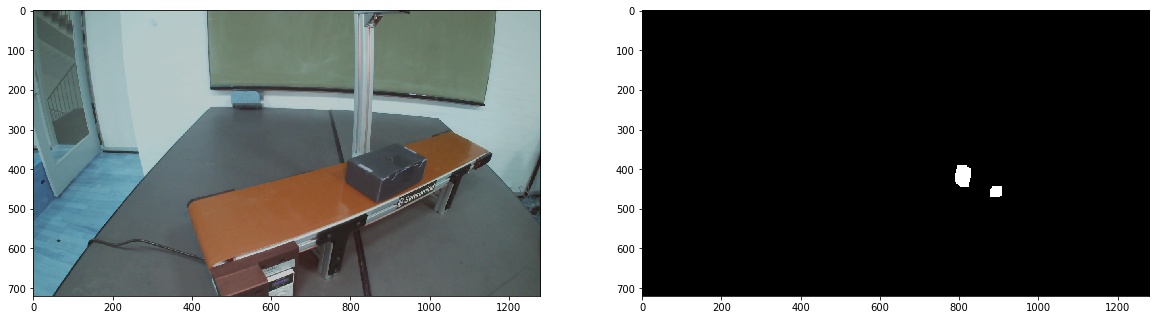

In [33]:
backsub = cv2.createBackgroundSubtractorKNN(history = 8, dist2Threshold = 8000, detectShadows = False)
backsub.apply(images1)
backsub.apply(images2)
backsub.apply(images3)
backsub.apply(images4)
backsub.apply(images5)
backsub.apply(images6)
backsub.apply(images7)
backsub.apply(images8)

fgmask = backsub.apply(image_withbox)
background = backsub.getBackgroundImage()

#均值去噪声
#fgmask = cv2.fastNlMeansDenoising(fgmask)

kernel = np.ones((19,19),np.uint8)
fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)


plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image_withbox, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(fgmask, cmap = 'gray')

1


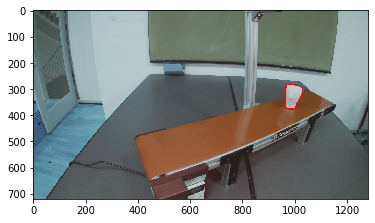

In [56]:
#fgmask = cv2.dilate(fgmask, None, iterations=2)
#fgmask = cv2.erode(fgmask, None, iterations=2)
cnts = cv2.findContours(fgmask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
cnts = imutils.grab_contours(cnts)
#img = cv2.drawContours(fgmask.copy(), cnts, 3, (0, 0, 0), cv2.FILLED)
area = [cv2.contourArea(c) for c in cnts]
maxArea = np.array(area)[np.array(area)>2000]
for i in range(len(maxArea)):
    idx = area.index(maxArea[i])
    obj = cnts[idx]
    #img = cv2.drawContours(image_withbottle, obj, -1, (255, 0, 0), 3)
    
output = image_withbottle.copy()
for c in cnts:
    img = cv2.drawContours(output, [c], -1, (255, 0, 0), 3)
plt.imshow(img, cmap = 'gray')
print(len(maxArea))

In [25]:
path = os.listdir('Stereo_conveyor_without_occlusions/left/')
#images = np.unique(images)
path.sort()

imagesL = glob.glob('Stereo_conveyor_without_occlusions/left/*.png')#'rs/left-*.png'

backsub2 = cv2.createBackgroundSubtractorKNN(history = 8, dist2Threshold = 8000, detectShadows = False)

#for i in range(len(imagesL)):
#    img = cv2.imread(imagesL[i])
#    fgmask = backsub2.apply(img)
#    kernel = np.ones((19,19),np.uint8)
#    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
#    cv2.imshow('fgmask',fgmask)
#    cv2.waitKey(1000)

print(path)                 
#for i in path:
    #img = cv2.imread(i)
    #cv2.imshow('fgmask',img) 
    #print(i)
    #plt.imshow(img)

#print(images[1])
#img = cv2.imread(images[1])
#plt.imshow(img)
#cv2.destroyAllWindows()

['1585434279_805531979_Left.png', '1585434279_838711977_Left.png', '1585434279_871912003_Left.png', '1585434279_905092001_Left.png', '1585434279_938282013_Left.png', '1585434279_971472025_Left.png', '1585434280_004652023_Left.png', '1585434280_037852049_Left.png', '1585434280_071032047_Left.png', '1585434280_104222059_Left.png', '1585434280_137412071_Left.png', '1585434280_170592070_Left.png', '1585434280_203782082_Left.png', '1585434280_236972094_Left.png', '1585434280_270162106_Left.png', '1585434280_303351879_Left.png', '1585434280_336531878_Left.png', '1585434280_369721889_Left.png', '1585434280_402911901_Left.png', '1585434280_436091900_Left.png', '1585434280_469291925_Left.png', '1585434280_502471924_Left.png', '1585434280_535661936_Left.png', '1585434280_568851948_Left.png', '1585434280_602031946_Left.png', '1585434280_635231972_Left.png', '1585434280_668411970_Left.png', '1585434280_701601982_Left.png', '1585434280_734791994_Left.png', '1585434280_767971992_Left.png', '15854342